# 1. Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import pickle

#2. Data Loading and Understanding

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# dropping customer id column as this is not required for modelling
df = df.drop(columns = ['customerID'])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
  if col not in numeric_cols:
    print(col,df[col].unique())
    print("-"*10)

gender ['Female' 'Male']
----------
SeniorCitizen [0 1]
----------
Partner ['Yes' 'No']
----------
Dependents ['No' 'Yes']
----------
PhoneService ['No' 'Yes']
----------
MultipleLines ['No phone service' 'No' 'Yes']
----------
InternetService ['DSL' 'Fiber optic' 'No']
----------
OnlineSecurity ['No' 'Yes' 'No internet service']
----------
OnlineBackup ['Yes' 'No' 'No internet service']
----------
DeviceProtection ['No' 'Yes' 'No internet service']
----------
TechSupport ['No' 'Yes' 'No internet service']
----------
StreamingTV ['No' 'Yes' 'No internet service']
----------
StreamingMovies ['No' 'Yes' 'No internet service']
----------
Contract ['Month-to-month' 'One year' 'Two year']
----------
PaperlessBilling ['Yes' 'No']
----------
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
----------
Churn ['No' 'Yes']
----------


In [ ]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df['TotalCharges'] == ' '])

11

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"})

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the class distribution of target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


#3. EDA

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize = (5,3))
  sns.histplot(df[column_name],kde = True)
  plt.title(f"Distribution of {column_name}")

  # calculate mean and median values for columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean,color = 'red', linestyle = '--', label = "Mean")
  plt.axvline(col_median,color = 'green', linestyle = '-', label = "Median")

  plt.legend()
  plt.show()


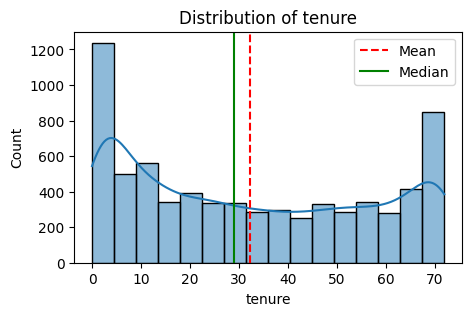

In [ ]:
plot_histogram(df,"tenure")

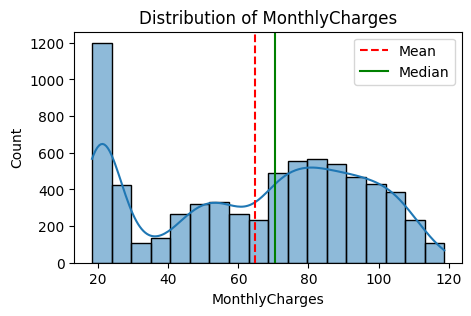

In [ ]:
plot_histogram(df,"MonthlyCharges")

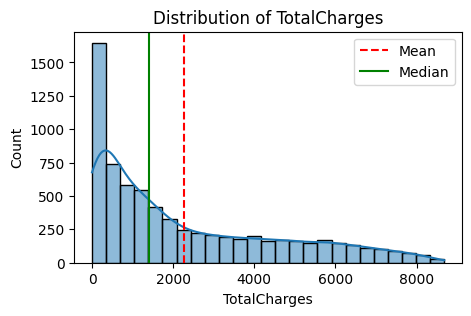

In [ ]:
plot_histogram(df,"TotalCharges")

**Indentifying outliers using boxplot**

In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y = df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.show()

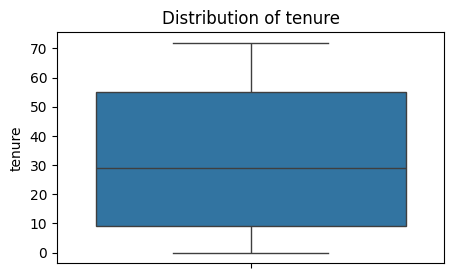

In [ ]:
plot_boxplot(df,"tenure")

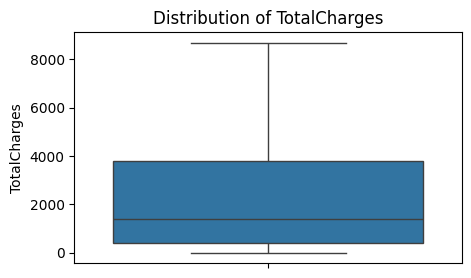

In [ ]:
plot_boxplot(df,"TotalCharges")

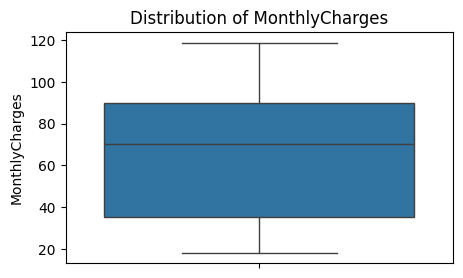

In [ ]:
plot_boxplot(df,"MonthlyCharges")

**Correlation Heatmap for numeric column**

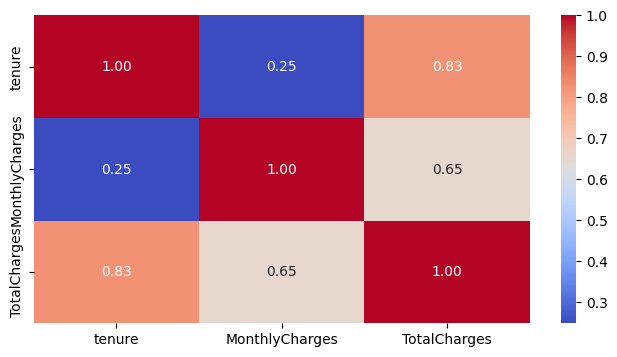

In [ ]:
plt.figure(figsize = (8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot = True, cmap = "coolwarm",fmt = ".2f")
plt.show()

In [ ]:
object_cols = df.select_dtypes(include = "object").columns.to_list()
object_cols += ["SeniorCitizen"]
print(object_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


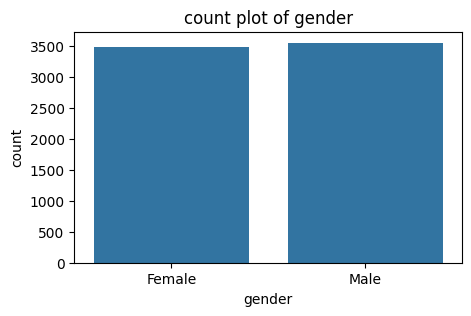

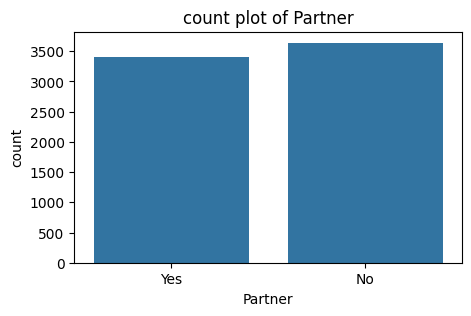

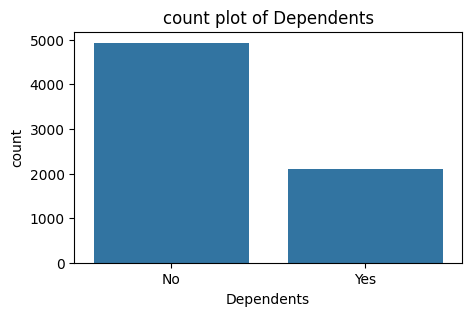

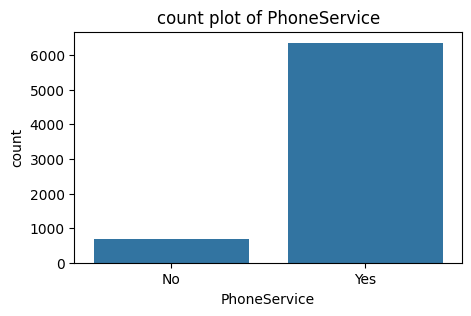

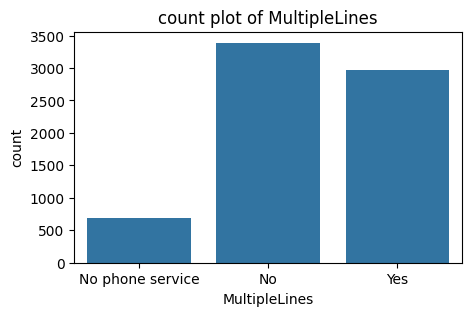

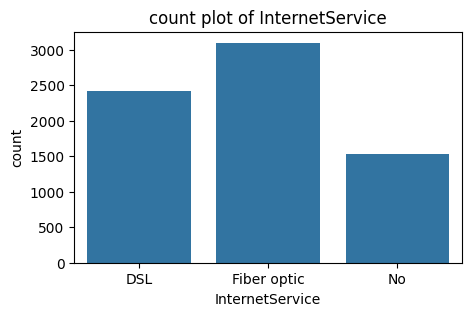

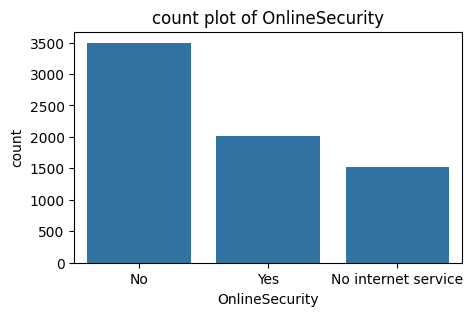

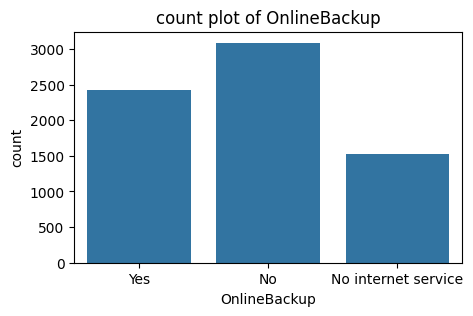

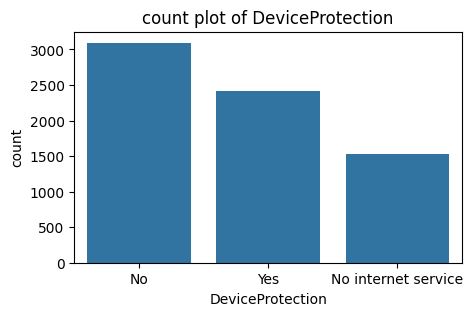

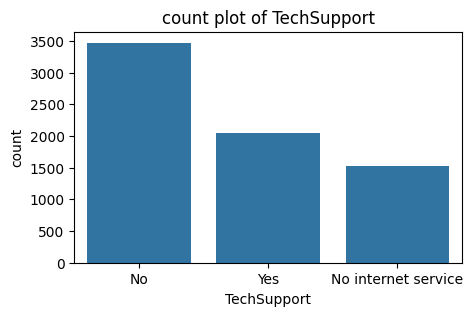

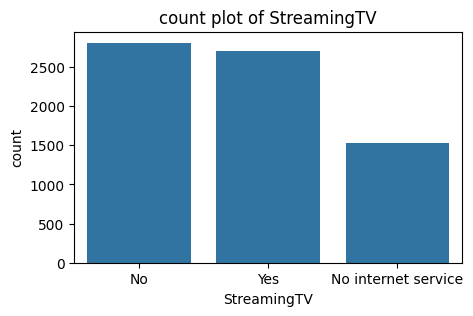

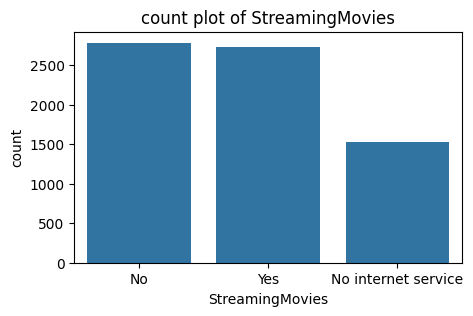

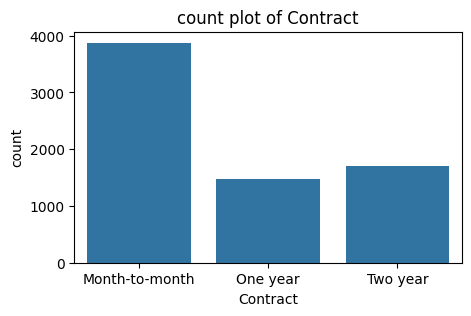

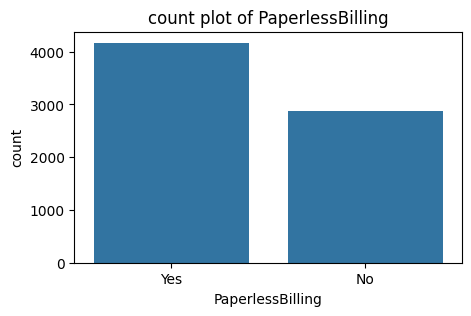

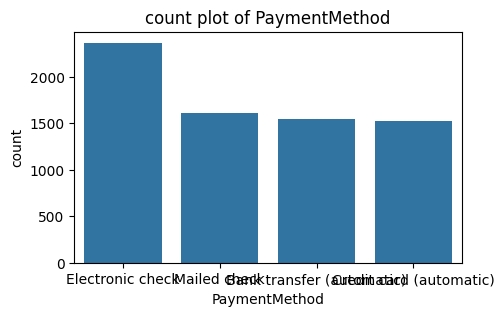

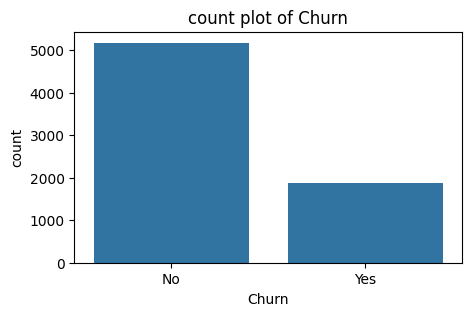

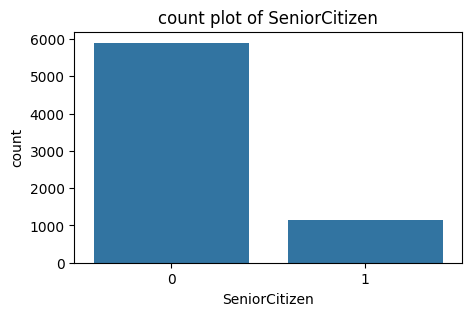

In [ ]:
for col in object_cols:
  plt.figure(figsize = (5,3))
  sns.countplot(x = df[col])
  plt.title(f"count plot of {col}")
  plt.show()

# 4. Data Preprocessing

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df["Churn"] = df['Churn'].replace({"Yes":1,"No":0})

/tmp/ipython-input-2651313119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df['Churn'].replace({"Yes":1,"No":0})


In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
object_cols = df.select_dtypes(include = "object").columns
object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
encoders = {}
for col in object_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder

with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [ ]:
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
y_train.shape

(5634,)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


## Synthetic Minority oversampling technique (SMOTE)

In [ ]:
smote = SMOTE(random_state = 42)

In [ ]:
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
y_train_smote.shape

(8276,)

In [ ]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


# 5. Model Training

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state= 42),
    "Random Forest":RandomForestClassifier(random_state = 42),
    "XG Boost": XGBClassifier(random_state = 42)
}

In [ ]:
# dictionary to store cross validation scores
cv_scores = {}
# perform 5 k-fold cross validation for each model
for model_name , model in models.items():
  print(f"Training {model_name} with default parameter")
  score = cross_val_score(model, X_train_smote,y_train_smote, cv = 5, scoring = 'accuracy')
  cv_scores[model_name] = score
  print(f"{model_name} cross validation accuracy:{np.mean(score):.2f}")
  print("-"*50)

Training Decision Tree with default parameter
Decision Tree cross validation accuracy:0.78
--------------------------------------------------
Training Random Forest with default parameter
Random Forest cross validation accuracy:0.84
--------------------------------------------------
Training XG Boost with default parameter
XG Boost cross validation accuracy:0.83
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XG Boost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

In [ ]:
# choosing random forest because it is giving more accurate result
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

# 6. Model Validation

In [ ]:
y_test_preds = model.predict(X_test)

In [ ]:
print("Accuracy : \n",accuracy_score(y_test,y_test_preds))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_test_preds))
print("Classification Report : \n",classification_report(y_test,y_test_preds))

Accuracy : 
 0.7785663591199432
Confusion Matrix: 
 [[878 158]
 [154 219]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# save the trained model as a pickle file
model_data = {"model": model, "features_name": X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

In [ ]:
loaded_model = model_data["model"]
features_name = model_data["features_name"]

# 7. Load the saved model and build a prediction System

In [ ]:
print(features_name)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 1, 'PhoneService': 'No', 'MultipleLines': 'No phone service', 'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No', 'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'MonthlyCharges': 29.85, 'TotalCharges': 29.85}
input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl","rb") as f:
  encoders = pickle.load(f)

print(input_data_df)

for column,encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [ ]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
prediction = model.predict(input_data_df)
prediction_prob = model.predict_proba(input_data_df)
print(prediction)

print(f"Prediction : {'churn' if prediction[0] == 1 else 'No Churn'}")
print("Prediction Probability",prediction_prob)

[0]
Prediction : No Churn
Prediction Probability [[0.78 0.22]]
